# **Escuela Politecnica Nacional**

# **[Taller 05] Mínimos cuadrados**

## **Nombres:** Sebastián Morales, Moisés Pineda

## **Fecha:** 09/06/2025

**Link al repositorio:** https://github.com/SebastianMoralesEpn/Github1.0/tree/81a1c746e5c1a0a7e55b45af76d42a640557a219/Talleres/%5BTaller%2005%5D%20M%C3%ADnimos%20cuadrados


**A)  Interpole los puntos:**

p1 = (5.4, 3.2)

p2_i = (9.5, 0.7)

p3 = (12.3, -3.6)

**De estos, el punto p2_i debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Puntos fijos
p1 = (5.4, 3.2)
p3 = (12.3, -3.6)

# Función para interpolación cuadrática (ax² + bx + c)
def quadratic_interpolation(p1, p2, p3):
    x = np.array([p1[0], p2[0], p3[0]])
    y = np.array([p1[1], p2[1], p3[1]])
    A = np.vstack([x**2, x, np.ones(len(x))]).T
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return a, b, c

# Función para graficar con parábola interpolada
def graficar_parabola(p2_x=9.5, p2_y=0.7):
    p2 = (p2_x, p2_y)
    
    # Calcular coeficientes de la parábola
    a, b, c = quadratic_interpolation(p1, p2, p3)
    
    # Crear figura
    plt.figure(figsize=(10, 6))
    
    # Puntos
    plt.scatter(*p1, color='blue', s=100, label='P1 (fijo)')
    plt.scatter(*p2, color='red', s=100, label='P2 (movible)')
    plt.scatter(*p3, color='green', s=100, label='P3 (fijo)')
    
    # Parábola interpolada
    x_vals = np.linspace(4, 14, 100)
    y_vals = a * x_vals**2 + b * x_vals + c
    plt.plot(x_vals, y_vals, 'r-', label=f'Parábola: y = {a:.2f}x² + {b:.2f}x + {c:.2f}')
    
    # Configuración del gráfico
    plt.xlim(4, 14)
    plt.ylim(-5, 5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación Cuadrática Interactiva')
    plt.grid(True)
    plt.legend()
    plt.show()

# Interfaz interactiva
interact(
    graficar_parabola,
    p2_x=(5.5, 12.3, 0.1),  # Rango para X de P2 (entre P1 y P3)
    p2_y=(-5.0, 5.0, 0.1)
)

interactive(children=(FloatSlider(value=9.5, description='p2_x', max=12.3, min=5.5), FloatSlider(value=0.7, de…

<function __main__.graficar_parabola(p2_x=9.5, p2_y=0.7)>

**Ejemplo de ejeción, donde se evidencia que la gráfica es movible:**

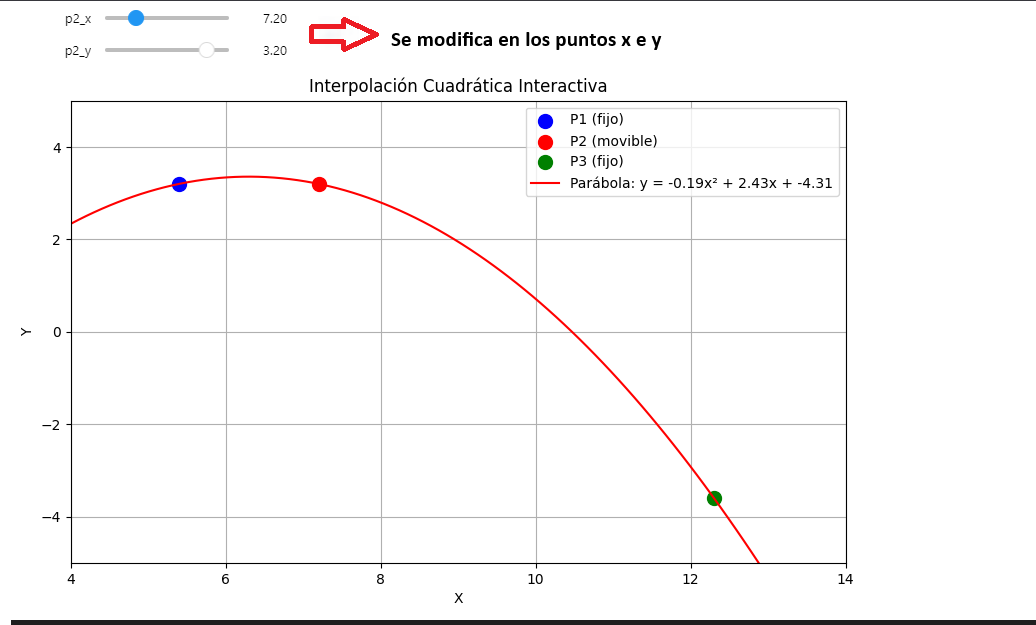

**B) Interpole el siguiente conjunto de datos:**

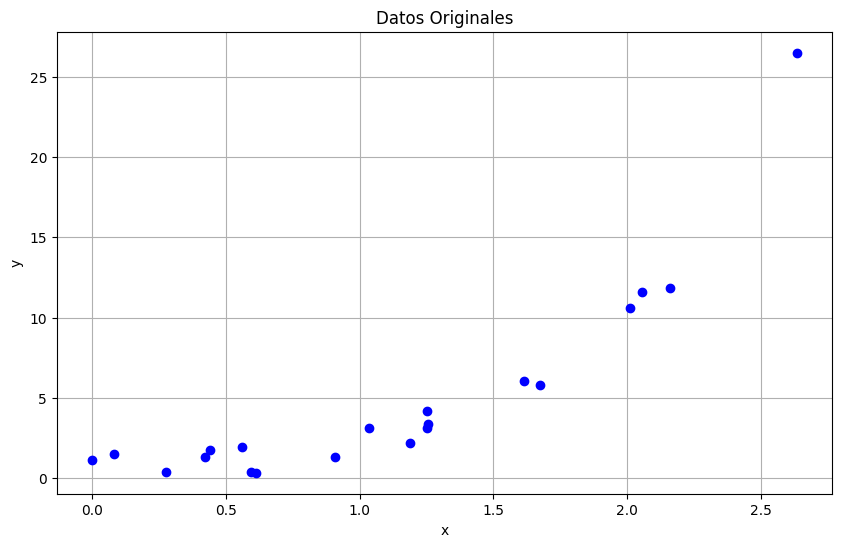

In [2]:
# Datos
xs = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 
               0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 
               2.0114, 2.0557, 2.1610, 2.6344])
ys = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 
               1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 
               10.5890, 11.5865, 11.8221, 26.5077])

# Graficar solo los puntos
plt.figure(figsize=(10, 6))
plt.plot(xs, ys, 'bo', markersize=6, label='Datos')
plt.grid(True)
plt.title('Datos Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

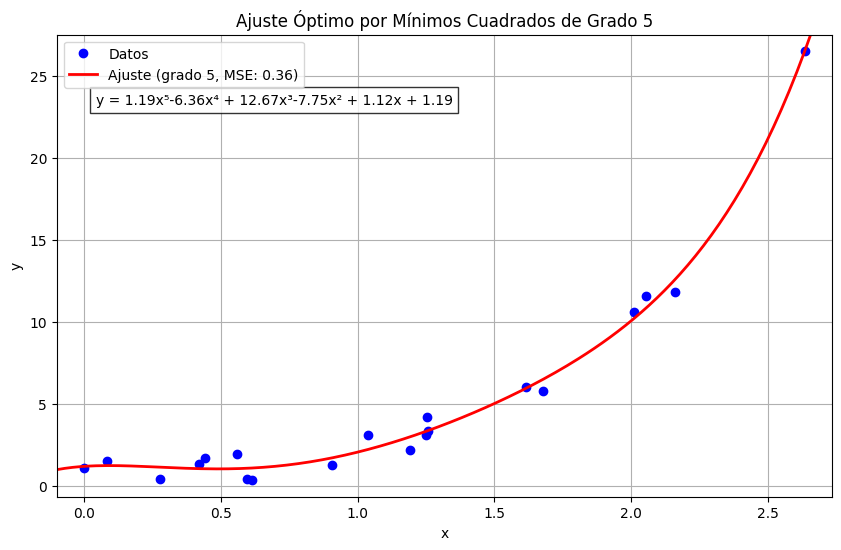

In [3]:
# Función para calcular el error cuadrático medio
def calcular_error(x, y, coef):
    y_pred = np.polyval(coef, x)
    return np.mean((y - y_pred)**2)

# Determinar automáticamente el mejor grado (hasta grado 5)
mejor_error = float('inf')
mejor_grado = 1
mejor_coef = None

for grado in range(1, 6):
    try:
        # Calcular coeficientes
        coef = np.polyfit(xs, ys, grado)
        
        # Calcular error de validación (usando todos los datos en este caso)
        error = calcular_error(xs, ys, coef)
        
        # Actualizar mejor ajuste
        if error < mejor_error:
            mejor_error = error
            mejor_grado = grado
            mejor_coef = coef
    except:
        continue

# Generar puntos para la curva ajustada
x_vals = np.linspace(min(xs)-0.1, max(xs)+0.1, 200)
y_vals = np.polyval(mejor_coef, x_vals)

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar datos y curva ajustada
plt.plot(xs, ys, 'bo', markersize=6, label='Datos')
plt.plot(x_vals, y_vals, 'r-', linewidth=2, 
         label=f'Ajuste (grado {mejor_grado}, MSE: {mejor_error:.2f})')

# Configuración del gráfico
plt.xlim(min(xs)-0.1, max(xs)+0.1)
plt.ylim(min(ys)-1, max(ys)+1)
plt.grid(True)
plt.legend()
plt.title('Ajuste Óptimo por Mínimos Cuadrados de Grado ' + str(mejor_grado))

plt.xlabel('x')
plt.ylabel('y')

# Mostrar ecuación del polinomio con potencias como superíndices (usando Unicode)
superíndices = {
    '0': '\u2070', '1': '\u00b9', '2': '\u00b2', '3': '\u00b3',
    '4': '\u2074', '5': '\u2075', '6': '\u2076', '7': '\u2077',
    '8': '\u2078', '9': '\u2079', '-': '\u207b'
}
def superindice(n):
    return ''.join(superíndices.get(ch, ch) for ch in str(n))

ecuacion = "y = "
for i, c in enumerate(mejor_coef):
    potencia = len(mejor_coef) - i - 1
    if abs(c) < 1e-10:
        continue
    signo = " + " if c >= 0 and i > 0 else ""
    if potencia == 0:
        ecuacion += f"{signo}{c:.2f}"
    elif potencia == 1:
        ecuacion += f"{signo}{c:.2f}x"
    else:
        ecuacion += f"{signo}{c:.2f}x{superindice(potencia)}"
        
plt.text(0.05, 0.85, ecuacion, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Mostrar gráfico
plt.show()